<h1 align="center">Decision trees</h1> 

- **Решающие деревья** -- принцип работы.
- **Критерий информативности**: Entropy, Gini, MSE
- **Cчитаем entropy-mse на простом примере**
- **Дискретизация признаков** :)
- **Алгоритм** ID3, CART
- **Контест**
- **Детали реализации**
    - Прунинг
    - Feature importance
    - Не стабильность
    - Missing Values
    - Как эффективно прогать
- **Tree Visualization** (Graphviz)


In [46]:
import scipy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
from IPython.core.display import Image, display

%pylab inline
sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


### Решающие деревья -- принцип работы

-------

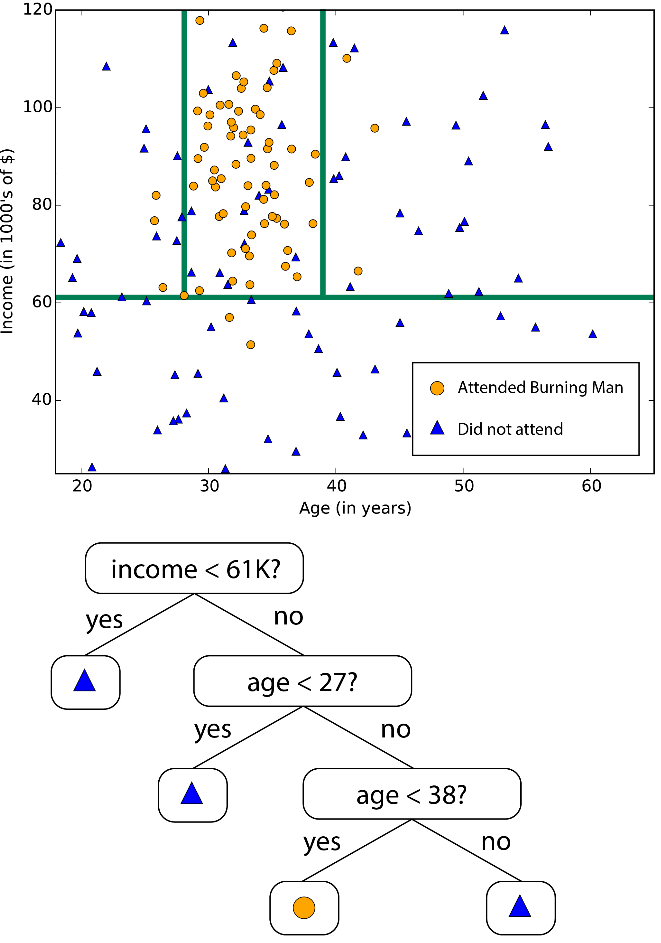

In [47]:
Image('pics/image5.png')

In [48]:
data = pd.read_csv('data/adult.csv', header=0, sep=', ', engine='python')

Adult dataset: https://archive.ics.uci.edu/ml/datasets/Adult

In [49]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### **Критерий информативности**: Entropy, Gini, MSE
### Entropy

### $$ H(p)=-\sum_{i=1}^np(i)\log_2 p(i) $$

In [50]:
sex = data.sex.value_counts(normalize=True)
print 'Sex counts: \n', sex

Sex counts: 
Male      0.669205
Female    0.330795
Name: sex, dtype: float64


In [51]:
sex = sex.to_dict()
sex

{'Female': 0.33079450876815825, 'Male': 0.66920549123184181}

In [52]:
from scipy.stats import entropy

In [53]:
# implement entropy function
entropy2 = lambda x: -np.sum(x*np.log2(x))

In [54]:
try: 
    assert entropy(sex.values(), base=2) - entropy2(sex.values()) < 0.001
    print 'Enropy function implementation is valid (-: '
except: 
    print 'Enropy function implementation is invalid'

Enropy function implementation is valid (-: 


---------
### Gini

<img src="pics/Economics_Gini_coefficient2.svg", height="400" width="400">

### $$ G=\frac {\sum_{i=1}^n \sum_{j=1}^n\left\vert y_i - y_j \right\vert }{ 2 n^2 \bar{y}} $$

In [55]:
Image('gini.png', width=800)

In [56]:
from pysal.inequality.gini import Gini

In [57]:
# implement gini function
def gini(x):
    return (x*(1-x)).sum()

In [ ]:
try: 
    assert Gini(np.array(sex.values())).g - gini(np.array(sex.values())) < 0.001
    print 'Gini function implementation is valid (-: '
except: 
    print 'Gini function implementation is invalid'

### MSE

- Если предсказываем цифру -- нужно смнимизировать что-то для цифр
- Если фича непрерывная -- отсечку выбираем сами

$$MSE = \sum_i (y_i - c_{feature})^2$$

--------
### Class Work
### $$entropy(p) = - \sum_i p_i~ln~p_i$$

In [58]:
np.log(1)

0.0

In [59]:
sc.stats.entropy([0.5, 0.5])

0.69314718055994529

In [60]:
sc.stats.entropy([0.1, 0.9])

0.3250829733914482

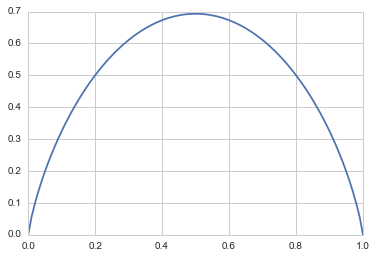

In [61]:
x = np.linspace(0, 1, 100)
y = map(lambda p: sc.stats.entropy([p, 1-p]), x)
pylab.plot(x, y)

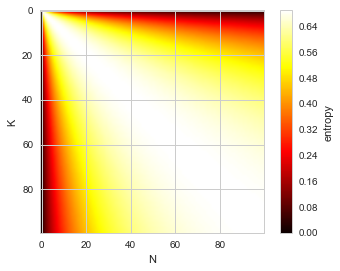

In [62]:
# Attantion, Bad code!!! 
im = np.zeros((100, 100))

for i in range(1, 100):
    for j in range(1, 100):
        p = [i , j]
        im[i, j] = sc.stats.entropy(p)
    
img = pylab.imshow(im, cmap='hot')
pylab.xlabel('N')
pylab.ylabel('K')
cb = pylab.colorbar(img)
cb.ax.set_ylabel('entropy')

In [63]:
sc.stats.entropy([0.1, 0.1, 0.8])

0.63903185965017695

In [64]:
sc.stats.entropy([0.1, 0.2, 0.7])

0.80181855254333734

In [65]:
N, K, P = 100, 100, 50
n, k, p = 10, 1, 1
print sc.stats.entropy([10.0/250, 1.0/250, 1.0/250])
print sc.stats.entropy([10.0/12, 1.0/12, 1.0/12])

0.56608573896
0.56608573896


---------
### Дискретизация признаков
https://github.com/UIUC-data-mining/mdlp-discretization

In [ ]:
from discretization import MDLP
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
plt.hist(X[:, 3])
print 'Iris, feature 1 histogram'

In [ ]:
mdlp = MDLP()
conv_X = mdlp.fit_transform(X, y)

In [ ]:
conv_X[:, 1]

--------
### ID3 Summary

1. Calculate the entropy of every attribute using the data set S
2. Split the set S into subsets using the attribute for which entropy is minimum (or, equivalently, information gain is maximum)
3. Make a decision tree node containing that attribute
4. Recurse on subsets using remaining attributes.

ID3 vs CART

Tests in CART are always binary, but ID3/C4.5 allows two or more outcomes.
1. CART uses the Gini diversity index to rank tests, whereas ID3/C4.5 uses information-based
criteria.
2. CART prunes trees using a cost-complexity model whose parameters are estimated by
cross-validation; ID3/C4.5 uses a single-pass algorithm derived from binomial confidence
limits.

Greate visualization: http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

-----------
### Контест

In [66]:
df = pd.read_table('./contest/contest.csv', sep='\t')

In [67]:
df

,Day,Outlook,Temperature,Humidity,Wind,PlayBaseball
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [73]:
print df.groupby('PlayBaseball')['PlayBaseball'].count()

PlayBaseball
No     5
Yes    9
Name: PlayBaseball, dtype: int64


In [69]:
df.groupby(['Outlook', 'PlayBaseball'])['PlayBaseball'].count().to_frame()

PlayBaseball
Outlook   PlayBaseball              
Overcast  Yes                      4
Rain      No                       2
          Yes                      3
Sunny     No                       3
          Yes                      2

In [70]:
df.groupby(['Temperature', 'PlayBaseball'])['PlayBaseball'].count().to_frame()

PlayBaseball
Temperature PlayBaseball              
Cool        No                       1
            Yes                      3
Hot         No                       2
            Yes                      2
Mild        No                       2
            Yes                      4

In [71]:
df.groupby(['Wind', 'PlayBaseball'])['PlayBaseball'].count().to_frame()

PlayBaseball
Wind   PlayBaseball              
Strong No                       3
       Yes                      3
Weak   No                       2
       Yes                      6

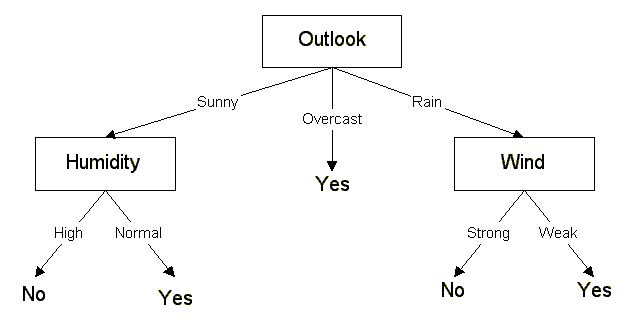

In [74]:
# Ansswer 
Image('./contest/tree.png')

--------
### Prooning

- Уменьшение дерева (объединение поддеревьев)
- Ограничение высосты, ограничение на листы <- часто используемый 

In [75]:
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = skl.preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

encoded_data, encoders = number_encode_features(data)
encoded_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [ ]:
tree = skl.tree.DecisionTreeClassifier(min_samples_split=1, min_samples_leaf=1)
tree = tree.fit(X_train, y_train)
print 'train score = ', skl.metrics.accuracy_score(y_train, tree.predict(X_train))
print 'test  score = ', skl.metrics.accuracy_score(y_test, tree.predict(X_test))

In [ ]:
tree = skl.tree.DecisionTreeClassifier(min_samples_leaf=30, max_depth=9)
tree = tree.fit(X_train, y_train)
print 'train score = ', skl.metrics.accuracy_score(y_train, tree.predict(X_train))
print 'test  score = ', skl.metrics.accuracy_score(y_test, tree.predict(X_test))

### Impotance 

Чем выше вершина в дереве, тем:
- нижее энтропия при разбиении по предикату из вершины
- вершина примит участие в решении для больших обектов
- ошибка в ней критична

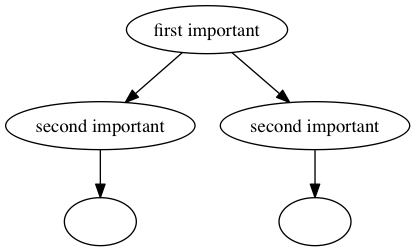

In [77]:
Image('pics/importance.png')

### Unstability
- Жадная стратегия выбара блоков -> ошибаемся -> Переподвешивание

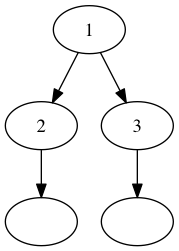

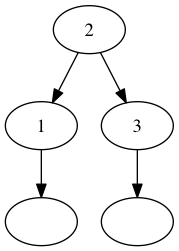

In [78]:
display(Image('pics/rew1.png'), Image('pics/rew2.png'))

### Missing Values

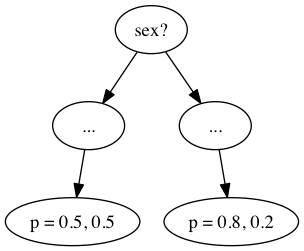

In [79]:
Image('pics/missing_value.png')

### How to code

- Мы не меняем матрицу объектов -> храним только индексы
- Запросы выполнять через numpy X[idx]... !!! Pandas часто копирует данные !! 
- Независимые ветви можно строить парралельно *= n память

### Tree Visualization (Graphviz)

In [80]:
# http://www.graphviz.org/About.php

In [81]:
value = """strict digraph G {
1 [label="hi\\nhi", shape="box"];
2;
3[label="hi\\nhi"];
4;
5;
1 -> 2;
1 -> 3;
1 -> 5  [weight="0.5", color="red"];
2 -> 4;
}
"""

open('tree.dot', 'w').write(value)

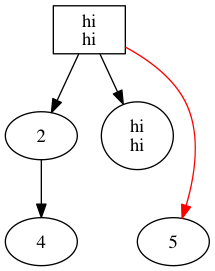

In [82]:
!dot -Tpng tree.dot -o tree.png
Image('tree.png')

In [83]:
import sklearn
tree = sklearn.tree.DecisionTreeClassifier(min_samples_leaf=30, max_depth=3)
tree = tree.fit(X_train, y_train)
sklearn.tree.export_graphviz(tree, 'tree.dot', feature_names=encoded_data.columns[:-2], class_names=['high50k', 'less50k'])

AttributeError: 'module' object has no attribute 'tree'

In [ ]:
!dot -Tpng tree.dot -o tree.png
Image('tree.png')